## Segmentation RFM  et Representation avec les K-means

In [1]:
 #Import library
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Fixer le nombre maximal de ligne et de colonnes a afficher
pd.set_option('display.max_row', 30)
pd.set_option('display.max_column', 30)

In [3]:
#importation du dataset depuis la base de données de l'archive archive.ics.uci.edu:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
#df = pd.read_excel(url)

In [4]:
#dataset en local
df = pd.read_excel('Online Retail.xlsx')

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df1=df.copy()

In [8]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Objectif :
- Comprendre les différents segments de client existant dans notre base et découper la base en 3 ou plus segments distincts.
-  

## Analyse de base de donnée
#### Analyse de Forme : 
- **lignes et colonnes** : 541909 , 8
- **types de variables** : -Au préalables: qualitatives : 4, quantitatives : 3, var Datetimes : 1
                    -Après l'analyse Exploratoire, on se rend compte que certaines variables étiquetés comme numérique possède des classes internes. Donc qualitatives ordinales 
- **Analyse des valeurs manquantes** :
    - On constate la variables "CustomerID" <==>  avec 135080 valeurs manquantes environ 24,92  % de la variable.
    - On constate la variables "Description" <==>  avec 1454 valeurs manquantes  environ 0,2683 % de la variable.
#### Analyse de Fond :
- **Visualisation de la target** :

    Nous sommes dans un cas de segmentation clients, toute les variables peuvent servir au decoupage des différents clusters.
    
    
    
- **Signification des variables** :


    Description du jeu de données : 
    
    InvoiceNo: Invoice number. type: Nominal, un nombre intégral à 6 chiffres attribué de manière unique à chaque transaction. Si ce code commence par la lettre 'c', cela indique une annulation
    StockCode: Code de produit (article). type: Nominal, un nombre entier à 5 chiffres attribué de manière unique à chaque produit distinct. 
    Description: Nom du produit (article).type: Nominal.
    Quantity: Les quantités de chaque produit (article) par transaction. type:Numérique.
    InvoiceDate: Date et heure de la facture. type:Numérique, le jour et l heure auxquels chaque transaction a été générée. 
    UnitPrice: Prix unitaire.type: Numérique, Prix unitaire du produit en livres sterling. 
    CustomerID: Numéro de client. type: Nominal, un nombre entier à 5 chiffres attribué de manière unique à chaque client. 
    Country: Nom du pays. type: Nominal, le nom du pays où réside chaque client.

      De l'analyse des meta données du dataset, la variable comme : CustomerID est de type nominale, de plus les valeurs manquantes étant a environ 25% de cette variable, elle sera retiré du jeu de donnée pour la suite de l'analyse.
      
      InvoiceNo : la variable sera supprimée car faisant reference a un numéro de transaction qui est spécifique lors de l'acahat.
      
      Egalement les valeurs manquantes sur la variable Description seront toute supprimées.

In [9]:
df1.dropna(axis=0,inplace=True)

In [10]:
df1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df1.shape

(406829, 8)

###### Visualisation des différentes variables 

In [12]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
#Decompte des client par pays
cust_pays = df1[['Country','CustomerID']].drop_duplicates()
cust_pays.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
...,...,...
28,Saudi Arabia,1
29,Singapore,1
16,Iceland,1
4,Brazil,1


In [50]:
#Selection des client provenat de la grande Bretagne
df_UK = df1.query("Country== 'United Kingdom'").reset_index(drop=True)

In [51]:
df_UK.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [52]:
df_UK = df_UK[pd.notnull(df_UK['CustomerID'])]

In [53]:
df_UK.Quantity.min()

-80995

In [54]:
df_UK.UnitPrice.min()

0.0

      a expliquer pourquoi rechercher les valeurs minimale négatives

In [55]:
df_UK = df_UK[(df_UK['Quantity']>0)]

In [56]:
df_UK['InvoiceDate'] = pd.to_datetime(df_UK['InvoiceDate'])

In [57]:
# Calcul du montan total des achat effectués par client 
df_UK['Achat_total'] = df_UK['Quantity']*df_UK['UnitPrice']

In [64]:
df_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Achat_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
361873,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
361874,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
361875,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
361876,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


##### Calcul des RFM pour chaque clients

In [139]:
RFM_client1 = df_UK.groupby(['CustomerID','InvoiceNo']).agg({'Achat_total': lambda x: x.sum(), 'InvoiceDate': lambda x: (fin_date - x.max()).days})
RFM_client1

Achat_total  InvoiceDate
CustomerID InvoiceNo                          
12346.0    541431        77183.60          325
12747.0    537215          358.56          369
           538537          347.71          361
           541677          303.04          323
           545321          310.78          283
...                           ...          ...
18283.0    579673          223.61            9
           580872          208.00            3
18287.0    554065          765.28          201
           570715         1001.32           58
           573167           70.68           42

[16649 rows x 2 columns]

In [207]:
#RFM_client1 = df_UK.groupby(['CustomerID','InvoiceNo']).agg({'Achat_total': lambda x: x.sum(), 'InvoiceDate': lambda x: (fin_date - x.max()).days})
#RFM_client1
RFM_client5 = df_UK.groupby(['CustomerID']).agg({'Achat_total': lambda x: x.sum(), 'InvoiceDate': lambda x: (fin_date - x.max()).days,'InvoiceNo': lambda x: len(x)})
RFM_client5

,Achat_total,InvoiceDate,InvoiceNo
CustomerID,,,
12346.0,77183.60,325,1
12747.0,4196.01,2,103
12748.0,33719.73,0,4596
12749.0,4090.88,3,199
12820.0,942.34,3,59
...,...,...,...
18280.0,180.60,277,10
18281.0,80.82,180,7
18282.0,178.05,7,12


In [208]:
#Renommer le nom des colonnes pour une meilleure comprehension
RFM_client5.rename(columns={'InvoiceDate':'Recency',
                          'InvoiceNo':'Frequency',
                          'Achat_total' : 'Montant'}, inplace=True)

In [209]:
RFM_client5.head()

,Montant,Recency,Frequency
CustomerID,,,
12346.0,77183.60,325,1
12747.0,4196.01,2,103
12748.0,33719.73,0,4596
12749.0,4090.88,3,199
12820.0,942.34,3,59


In [210]:
RFM_client5.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

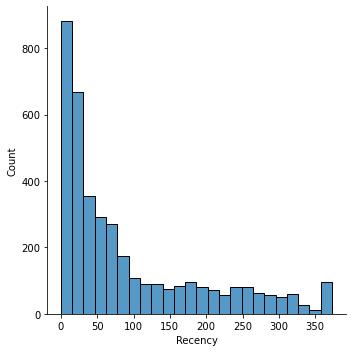

In [231]:
rr=RFM_client5['Recency']
ax=sns.displot(rr)

In [211]:
RFM_client5.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

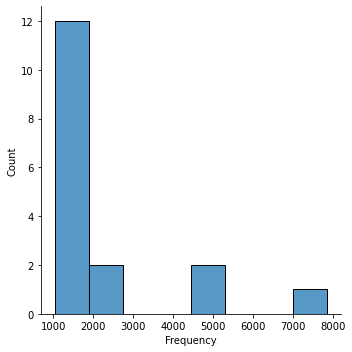

In [213]:
r=RFM_client5.query('Frequency>1000')['Frequency']
ax=sns.displot(r)

In [212]:
RFM_client5.Montant.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Montant, dtype: float64

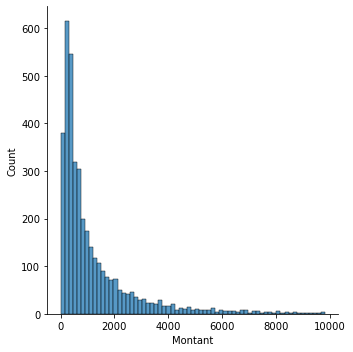

In [214]:
#utiliser plotly
er=RFM_client5.query('Montant<10000')['Montant']
ax=sns.displot(er)

     -Au niveau de la recency, on observe l'ensemble des 3 premier quantile inférieurs a 150, cela donne l'intuition sur la 4è groupe qui elle est comprise entre le 3è quartile et la valeur max de la variable.
     De plus un client a une variable recency élevée, plus la date de sont dernier achat est éloigné.
     
     -Au niveau de la variable Frequency et tenant compte du filtre éffectué, le troisième quantile étant à 99, on peut observer graphiquement  que seul quelques 2 client possèdent les valeurs de fréquence a 2000, 5000, 7000, l'on peut suposer des clients éffectuant de nombreux Achat à monta élévé ou pas.
     
     
     -Au niveau de la variable Montant et tenant compte du filtre éffectué, on observe le 3èm quantile à 1575, l'on peut observer graphiquement que très peut de client depense a forte valeur.

In [215]:
#Variable Quantiles devant referencer les valeurs des différents q pour cahque variables.
quantiles = RFM_client5.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()

In [216]:
quantiles

{'Montant': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0}}

    Montant : plus un client aura une valeur de  quantile faible, plus il  aura tendance a depenser plus.
    Recency : plus un client aura une valeur de quantiles faible, plus proche sera la date du dernier Achat du client
    Frequency:plus un client aura une valeur de quantiles faible, moins un client aura fait  de commande 

In [217]:
#Fonction permettant de d'appliquer les différentes valeurs de quantiles.

def RScoring(x,p,d):
    if x <=d[p][0.25]:
        return 1
    elif x > d[p][0.25] and x <=d[p][0.50]:
        return 2
    elif x > d[p][0.50] and x <=d[p][0.75]:
        return 3
    else:
        return 4
    

def FnMScoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x > d[p][0.25] and x <=d[p][0.50]:
        return 3
    elif x > d[p][0.50] and x <=d[p][0.75]:
        return 2
    else:
        return 1

In [219]:
#Calcul des différents segments RFM

RFM_client5['R']= RFM_client5['Recency'].apply(RScoring,args=('Recency',quantiles,))
RFM_client5['F']=RFM_client5['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
RFM_client5['M']=RFM_client5['Montant'].apply(FnMScoring,args=('Montant',quantiles,))
RFM_client5.head()

,Montant,Recency,Frequency,R,F,M
CustomerID,,,,,,
12346.0,77183.60,325,1,4,4,1
12747.0,4196.01,2,103,1,1,1
12748.0,33719.73,0,4596,1,1,1
12749.0,4090.88,3,199,1,1,1
12820.0,942.34,3,59,1,2,2


In [220]:
#Creation des différents group

RFM_client5['RFM_Group'] = RFM_client5.R.map(str)+ RFM_client5.F.map(str)+ RFM_client5.M.map(str)

In [221]:
RFM_client5

,Montant,Recency,Frequency,R,F,M,RFM_Group
CustomerID,,,,,,,
12346.0,77183.60,325,1,4,4,1,441
12747.0,4196.01,2,103,1,1,1,111
12748.0,33719.73,0,4596,1,1,1,111
12749.0,4090.88,3,199,1,1,1,111
12820.0,942.34,3,59,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,180.60,277,10,4,4,4,444
18281.0,80.82,180,7,4,4,4,444
18282.0,178.05,7,12,1,4,4,144


In [224]:
#Calcul des différents Scores RFM , pour un client donné, le score s'effectura suivant la somme de ses différents scores RFM
RFM_client5['RFMScore']=RFM_client5[['R','F','M']].sum(axis = 1)

In [225]:
RFM_client5

,Montant,Recency,Frequency,R,F,M,RFM_Group,RFMScore
CustomerID,,,,,,,,
12346.0,77183.60,325,1,4,4,1,441,9
12747.0,4196.01,2,103,1,1,1,111,3
12748.0,33719.73,0,4596,1,1,1,111,3
12749.0,4090.88,3,199,1,1,1,111,3
12820.0,942.34,3,59,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,180.60,277,10,4,4,4,444,12
18281.0,80.82,180,7,4,4,4,444,12
18282.0,178.05,7,12,1,4,4,144,9


In [232]:
Nivo_loyaute[0]

'Diamant'

In [233]:
#Classification des 
#Nivo_loyaute = ['Diamant','Or','Argent','Bronze']
Nivo_loyaute = ['Bronze','Argent','Or','Diamant']
score_loy=pd.qcut(RFM_client5.RFMScore, q=4,labels = Nivo_loyaute)
RFM_client5['Niveau_loyaute']=score_loy.values
RFM_client5.reset_index().head(10)

,CustomerID,Montant,Recency,Frequency,R,F,M,RFM_Group,RFMScore,Niveau_loyaute
0,12346.0,77183.60,325,1,4,4,1,441,9,Or
1,12747.0,4196.01,2,103,1,1,1,111,3,Bronze
2,12748.0,33719.73,0,4596,1,1,1,111,3,Bronze
3,12749.0,4090.88,3,199,1,1,1,111,3,Bronze
4,12820.0,942.34,3,59,1,2,2,122,5,Bronze
5,12821.0,92.72,214,6,4,4,4,444,12,Diamant
6,12822.0,948.88,70,46,3,2,2,322,7,Argent
7,12823.0,1759.50,74,5,3,4,1,341,8,Argent
8,12824.0,397.12,59,25,3,3,3,333,9,Or
9,12826.0,1474.72,2,91,1,2,2,122,5,Bronze


In [230]:
RFM_client5[RFM_client5['RFM_Group']=='111'].sort_values('Montant',ascending=False).reset_index().head(10)

,CustomerID,Montant,Recency,Frequency,R,F,M,RFM_Group,RFMScore,Niveau_loyaute
0,18102.0,259657.30,0,431,1,1,1,111,3,Diamant
1,17450.0,194550.79,8,337,1,1,1,111,3,Diamant
2,17511.0,91062.38,2,963,1,1,1,111,3,Diamant
3,16684.0,66653.56,4,277,1,1,1,111,3,Diamant
4,14096.0,65164.79,4,5111,1,1,1,111,3,Diamant
5,13694.0,65039.62,3,568,1,1,1,111,3,Diamant
6,15311.0,60767.90,0,2379,1,1,1,111,3,Diamant
7,13089.0,58825.83,2,1818,1,1,1,111,3,Diamant
8,15769.0,56252.72,7,130,1,1,1,111,3,Diamant
9,15061.0,54534.14,3,403,1,1,1,111,3,Diamant
